Bank Danych Lokalnych GUS -> https://bdl.stat.gov.pl/bdl/dane/podgrup/temat

In [1]:
import pandas as pd

In [3]:
gestosc = pd.read_excel("LUDN_2425_XPIV_20251022120949.xlsx", sheet_name='DANE', dtype={'Kod':str})
gestosc

,Kod,Nazwa,Wskaźniki,Rok,Wartosc,Jednostka miary,Atrybut
0,0201011,Bolesławiec (1),ludność na 1 km2,2024,1610.3,osoba,
1,0201022,Bolesławiec (2),ludność na 1 km2,2024,53.1,osoba,
2,0201032,Gromadka (2),ludność na 1 km2,2024,18.6,osoba,
3,0201043,Nowogrodziec (3),ludność na 1 km2,2024,82.2,osoba,
4,0201044,Nowogrodziec - miasto (4),ludność na 1 km2,2024,251.6,osoba,
...,...,...,...,...,...,...,...
3912,3218054,Węgorzyno - miasto (4),ludność na 1 km2,2024,378.1,osoba,
3913,3218055,Węgorzyno - obszar wiejski (5),ludność na 1 km2,2024,14.7,osoba,
3914,3261011,Koszalin (1),ludność na 1 km2,2024,997.1,osoba,
3915,3262011,Szczecin (1),ludność na 1 km2,2024,1286.4,osoba,


In [4]:
plec = pd.read_excel("LUDN_2137_XPIV_20251022121246.xlsx", sheet_name='DANE', dtype={'Kod':str})
plec

,Kod,Nazwa,Wiek,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0201011,Bolesławiec (1),ogółem,mężczyźni,2024,17082,osoba,
1,0201011,Bolesławiec (1),ogółem,kobiety,2024,19713,osoba,
2,0201022,Bolesławiec (2),ogółem,mężczyźni,2024,7671,osoba,
3,0201022,Bolesławiec (2),ogółem,kobiety,2024,7688,osoba,
4,0201032,Gromadka (2),ogółem,mężczyźni,2024,2497,osoba,
...,...,...,...,...,...,...,...,...
7829,3261011,Koszalin (1),ogółem,kobiety,2024,55803,osoba,
7830,3262011,Szczecin (1),ogółem,mężczyźni,2024,182957,osoba,
7831,3262011,Szczecin (1),ogółem,kobiety,2024,203749,osoba,
7832,3263011,Świnoujście (1),ogółem,mężczyźni,2024,18431,osoba,


In [10]:
plec_pivot = pd.pivot_table(plec[['Kod', 'Płeć', 'Wartosc']], index='Kod', columns='Płeć', values='Wartosc').reset_index()
plec_pivot['razem'] = plec_pivot['kobiety'] + plec_pivot['mężczyźni']
plec_pivot['procent_kobiety'] = plec_pivot['kobiety'] / plec_pivot['razem']
plec_pivot['procent_mężczyźni'] = plec_pivot['mężczyźni'] / plec_pivot['razem']
plec_pivot

Płeć,Kod,kobiety,mężczyźni,razem,procent_kobiety,procent_mężczyźni
0,0201011,19713.0,17082.0,36795.0,0.535752,0.464248
1,0201022,7688.0,7671.0,15359.0,0.500553,0.499447
2,0201032,2481.0,2497.0,4978.0,0.498393,0.501607
3,0201043,7289.0,7234.0,14523.0,0.501894,0.498106
4,0201044,2060.0,1990.0,4050.0,0.508642,0.491358
...,...,...,...,...,...,...
3912,3218054,1346.0,1244.0,2590.0,0.519691,0.480309
3913,3218055,1769.0,1888.0,3657.0,0.483730,0.516270
3914,3261011,55803.0,49460.0,105263.0,0.530129,0.469871
3915,3262011,203749.0,182957.0,386706.0,0.526883,0.473117


In [11]:
plec_pivot['procent_kobiety'].mean()

np.float64(0.5064681467362314)

In [13]:
scalone = pd.merge(gestosc, plec_pivot, how='left', left_on='Kod', right_on='Kod')
scalone

,Kod,Nazwa,Wskaźniki,Rok,Wartosc,Jednostka miary,Atrybut,kobiety,mężczyźni,razem,procent_kobiety,procent_mężczyźni
0,0201011,Bolesławiec (1),ludność na 1 km2,2024,1610.3,osoba,,19713.0,17082.0,36795.0,0.535752,0.464248
1,0201022,Bolesławiec (2),ludność na 1 km2,2024,53.1,osoba,,7688.0,7671.0,15359.0,0.500553,0.499447
2,0201032,Gromadka (2),ludność na 1 km2,2024,18.6,osoba,,2481.0,2497.0,4978.0,0.498393,0.501607
3,0201043,Nowogrodziec (3),ludność na 1 km2,2024,82.2,osoba,,7289.0,7234.0,14523.0,0.501894,0.498106
4,0201044,Nowogrodziec - miasto (4),ludność na 1 km2,2024,251.6,osoba,,2060.0,1990.0,4050.0,0.508642,0.491358
...,...,...,...,...,...,...,...,...,...,...,...,...
3912,3218054,Węgorzyno - miasto (4),ludność na 1 km2,2024,378.1,osoba,,1346.0,1244.0,2590.0,0.519691,0.480309
3913,3218055,Węgorzyno - obszar wiejski (5),ludność na 1 km2,2024,14.7,osoba,,1769.0,1888.0,3657.0,0.483730,0.516270
3914,3261011,Koszalin (1),ludność na 1 km2,2024,997.1,osoba,,55803.0,49460.0,105263.0,0.530129,0.469871
3915,3262011,Szczecin (1),ludność na 1 km2,2024,1286.4,osoba,,203749.0,182957.0,386706.0,0.526883,0.473117


In [15]:
scalone[['Wartosc', 'procent_kobiety']].corr()

,Wartosc,procent_kobiety
Wartosc,1.000000,0.545837
procent_kobiety,0.545837,1.000000


<Axes: >

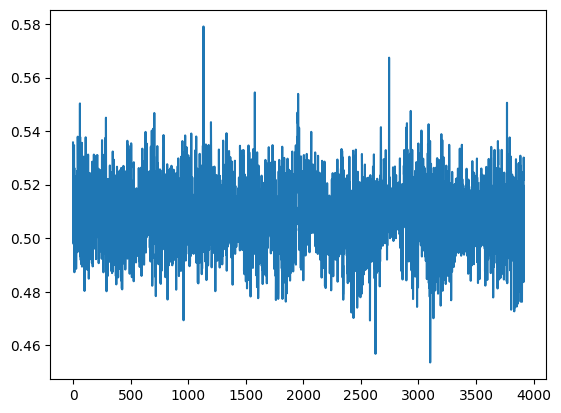

In [17]:
scalone['procent_kobiety'].plot()